In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the CSV file into a Pandas DataFrame
rate_df = pd.read_csv("Resources/global_carry_trades.csv")

# Review the DataFrame
rate_df.head()

,interest_differential,next_month_currency_return,IMF Country Code
0,0.001414,-0.061174,GBR
1,-0.000570,-0.058120,BEL
2,0.001478,-0.056031,DNK
3,0.000655,-0.056991,FRA
4,-0.002928,-0.067056,DEU


In [3]:
rate_df.shape

(999, 3)

## Prepare the Data 

In [4]:
# [rate_df['interest_differential'],rate_df['next_month_currency_return']]

In [5]:
type(rate_df['interest_differential'])

type(rate_df[['interest_differential', 'next_month_currency_return']])

pandas.core.frame.DataFrame

In [6]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
scaled_df = StandardScaler().fit_transform(rate_df[['interest_differential', 'next_month_currency_return']])

# Diplay the first five rows of the scaled data
scaled_df[:5, :]

array([[-0.24270991, -1.93608838],
       [-0.8539933 , -1.84109498],
       [-0.22308154, -1.77613322],
       [-0.47661717, -1.80599379],
       [-1.58045852, -2.11907333]])

In [7]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
scaled_df = pd.DataFrame(scaled_df, columns=['interest_differential', 'next_month_currency_return'])

scaled_df.head()

,interest_differential,next_month_currency_return
0,-0.242710,-1.936088
1,-0.853993,-1.841095
2,-0.223082,-1.776133
3,-0.476617,-1.805994
4,-1.580459,-2.119073


In [8]:
# Encode (convert to dummy variables) the "IMF Country Code" column
encoded_countries = pd.get_dummies(rate_df['IMF Country Code'], dtype=int)

# Review the DataFrame
encoded_countries.head()

,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
# Concatenate the scaled data DataFrame with the "IMF Country Code" encoded dummies 
scaled_df = pd.concat([scaled_df, encoded_countries],axis=1)

# Display the combined DataFrame.
scaled_df.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Fit and Predict with KMeans

In [10]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model for the rate_df_scaled DataFrame
model.fit(scaled_df)

# Save the predicted model clusters to a new DataFrame.
clusters = model.predict(scaled_df)

# View the country clusters
clusters[:100]

array([0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2], dtype=int32)

In [11]:
# Create a copy of the concatenated DataFrame
scaled_preds = scaled_df.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
scaled_preds["Cluster"]= clusters

# Review the DataFrame
scaled_preds.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,Cluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


## Plot and Analyze the Results

In [12]:
# Group the saved DataFrame by cluster using `groupby` to calculate average currency returns
scaled_preds.groupby(['Cluster']).agg({'next_month_currency_return' : "mean"}).reset_index(drop=True)

,next_month_currency_return
0,-1.140166
1,0.627322
2,-0.223316


In [14]:
scaled_preds.groupby(['Cluster']).agg({'interest_differential' : "mean"}).reset_index(drop=True)

,interest_differential
0,0.584901
1,0.409084
2,-1.130487


<Axes: xlabel='interest_differential', ylabel='next_month_currency_return'>

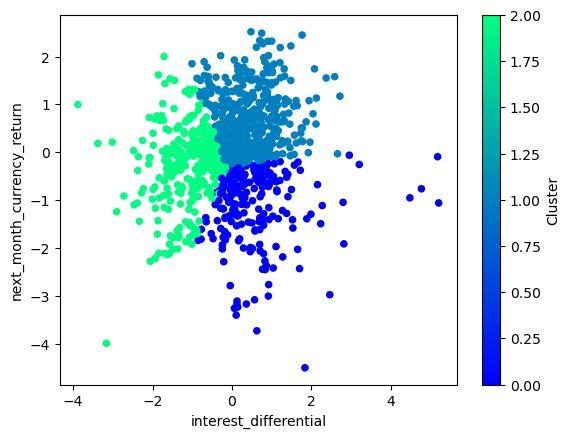

In [13]:
# Create a scatter plot of the interest differential and next months currency return.
scaled_preds.plot.scatter(
x='interest_differential',
y='next_month_currency_return',
c='Cluster', colormap="winter")

* Based on this plot, which cluster of country appears to provide both the highest interest spread and currency return?

## Fit and Predict with the Birch Clustering Algorithm

In [15]:
scaled_df.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
# Initialize a Birch model with n_clusters=5
birch_model = Birch(n_clusters=5)

# Fit the model for the rate_df_scaled DataFrame
birch_model.fit(scaled_df)

# Predict the model segments (clusters)
birch_preds= birch_model.predict(scaled_df)

# View the stock segments
print(birch_preds[:200])

[3 4 3 4 4 4 4 3 4 4 3 4 3 2 1 3 1 3 1 1 2 1 3 2 4 3 1 3 2 1 2 1 3 1 1 2 1
 3 2 1 3 1 3 2 1 3 1 3 1 1 2 1 3 2 4 3 1 3 2 1 3 1 1 4 4 4 4 3 4 4 3 1 2 2
 1 3 4 3 4 4 4 4 3 4 4 3 4 3 0 1 3 1 1 4 4 4 4 3 4 4 3 1 3 2 1 3 1 1 1 1 2
 1 3 4 4 3 4 3 0 1 3 1 1 1 1 2 1 3 2 1 3 1 3 3 1 2 1 1 1 1 2 1 3 2 1 3 1 2
 3 1 2 1 1 1 1 2 1 3 2 1 3 1 2 1 1 3 1 1 4 4 4 4 3 4 4 3 4 3 3 1 3 4 3 4 4
 4 4 3 4 4 3 4 2 3 1 3 1 3 1 2]


In [17]:
scaled_preds.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,Cluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


In [18]:
# Create a copy of the concatenated DataFrame
##############

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
scaled_preds['BirchCluster'] = birch_preds

# Review the DataFrame
scaled_preds.head()

,interest_differential,next_month_currency_return,AUS,BEL,CAN,CHE,DEU,DNK,FRA,GBR,ITA,JPN,NLD,NOR,NZL,SGP,SWE,Cluster,BirchCluster
0,-0.242710,-1.936088,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
1,-0.853993,-1.841095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,-0.223082,-1.776133,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
3,-0.476617,-1.805994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4
4,-1.580459,-2.119073,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,4


In [20]:
scaled_preds.groupby(['BirchCluster']).agg({'next_month_currency_return' : "mean"}).reset_index(drop=True)

,next_month_currency_return
0,-1.584836
1,0.286724
2,0.947277
3,-0.128652
4,-1.339890


In [22]:
# scaled_preds[scaled_preds['BirchCluster']==0]

<Axes: xlabel='interest_differential', ylabel='next_month_currency_return'>

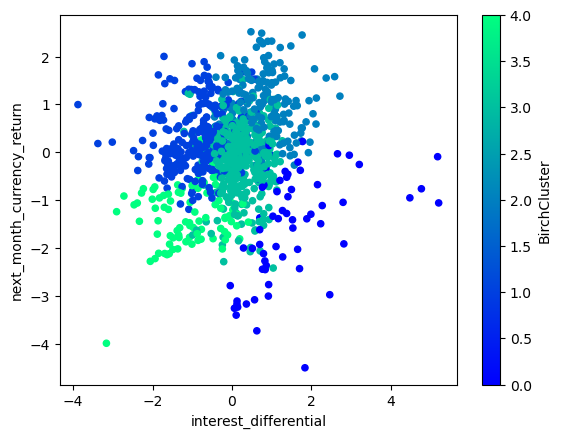

In [24]:
# Create a scatter plot of the interest differential and next months currency return.
scaled_preds.plot.scatter(
x='interest_differential',
y='next_month_currency_return',
c='BirchCluster', colormap="winter")

* Based on this plot, which cluster of country appears to provide both the highest interest spread and currency return?

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

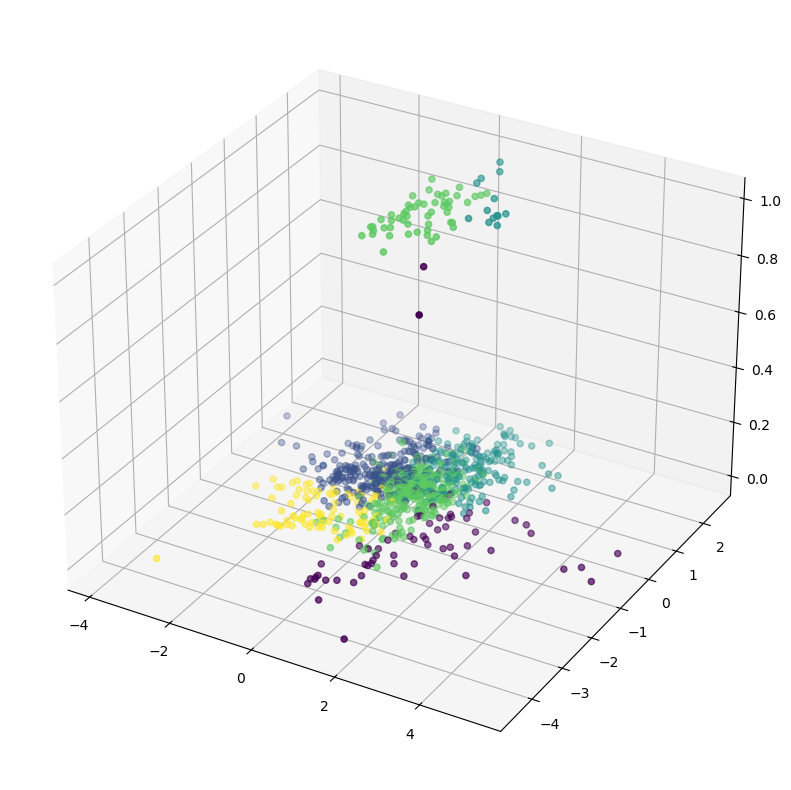

In [26]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(scaled_preds['interest_differential'], 
             scaled_preds['next_month_currency_return'], 
             scaled_preds['AUS'], 
             c=scaled_preds['BirchCluster'])
plt.show()